In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('netflix.csv')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


Release_Date, Vote_Average , Vote_Count columns casted into Date Time, Float, Integer respectively and extracted only Year from Release_Date

In [5]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce').astype('Int64')


C:\Users\Vvedika\AppData\Local\Temp\ipykernel_28008\3408562976.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   float64
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: Int64(1), float64(3), object(5)
memory usage: 701.4+ KB


In [7]:
df.isnull().sum()

Release_Date         10
Title                 9
Overview              9
Popularity           10
Vote_Count           11
Vote_Average         11
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

Removing Null Values 

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   float64
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: Int64(1), float64(3), object(5)
memory usage: 777.3+ KB


In [10]:
df.duplicated().sum()

0

Description of the Dataset

In [11]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.0,9826.000000
mean,2006.202931,40.323951,1392.943721,6.439467
std,15.686202,108.879332,2611.303856,1.129797
min,1902.000000,13.354000,0.0,0.000000
25%,2000.000000,16.128250,146.0,5.900000
50%,2011.000000,21.195000,444.0,6.500000
75%,2017.000000,35.179250,1376.0,7.100000
max,2024.000000,5083.954000,31077.0,10.000000


Dropping the Columns 

In [12]:
cols=['Overview','Original_Language','Poster_Url']
df.drop(cols,axis=1,inplace=True)


In [13]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

**Categorizing 'Vote-Average' Column**

Dividing 'Vote_Average' values into 4 categories: 'popular', 'average', 'below average', 'not popular' to describe it more using categorize_col() function

In [14]:
def categorize_col(df,col,labels):
    
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
     
    return df 

In [15]:
labels=['not_popular','below_avg','average','popular']

In [16]:
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [18]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

Spliting Genres into a list and exploding the dataframe to have only one genre per row for each movie  

In [19]:
df['Genre']=df['Genre'].str.split(', ')

df=df.explode('Genre').reset_index(drop=True)

df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151,popular,Crime
4,2022.0,The Batman,3827.658,1151,popular,Mystery


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  float64 
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  Int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25792 non-null  object  
dtypes: Int64(1), category(1), float64(2), object(2)
memory usage: 1.0+ MB


Unique Data in each columns

In [21]:
df.nunique()

Release_Date     102
Title           9512
Popularity      8159
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

Data Visualization

In [22]:
sns.set_style('whitegrid')

**Most Frequent Genre of Movies Released on Netflix**

In [23]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

C:\Users\Vvedika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


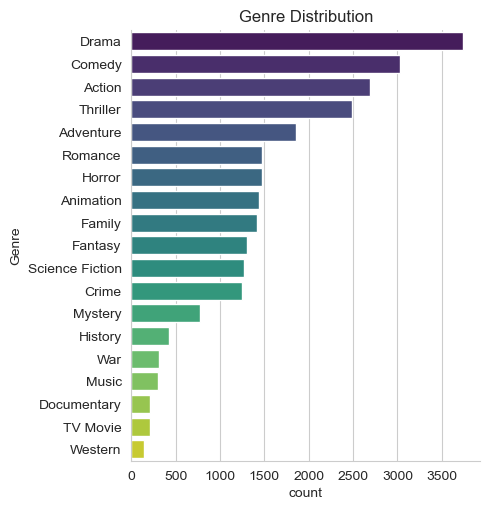

In [24]:
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Genre Distribution')
plt.show()

**Highest Votes in Vote Avg**

C:\Users\Vvedika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


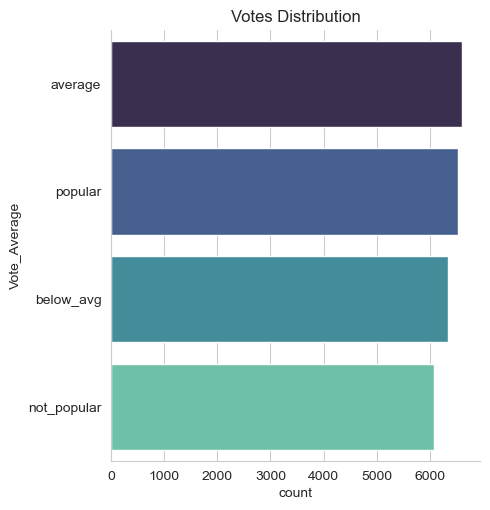

In [26]:
sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index, palette='mako')
plt.title('Votes Distribution')
plt.show()

**Highest Popularity Movie and it's Genre** 

In [27]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


**Lowest Popularity Movie and it's Genre**

In [28]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021.0,The United States vs. Billie Holiday,13.354,152,average,Music
25787,2021.0,The United States vs. Billie Holiday,13.354,152,average,Drama
25788,2021.0,The United States vs. Billie Holiday,13.354,152,average,History
25789,1984.0,Threads,13.354,186,popular,War
25790,1984.0,Threads,13.354,186,popular,Drama
25791,1984.0,Threads,13.354,186,popular,Science Fiction


**Year with Most Film**

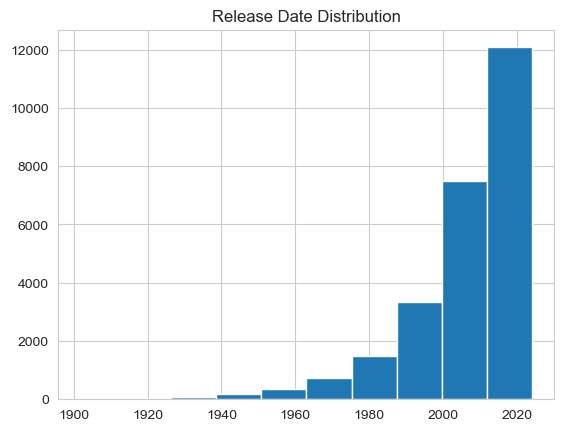

In [31]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.show()